# key points about TD Lambda With Backward View
### 1. TD(λ) with the backward view incorporates information from every time step without waiting for the end of an episode through the use of eligibility traces. After every single time step and after observing a reward, the value function for all states is updated. The size of the update for each state is proportional to its eligibility trace and the TD error from the last transition. This results in faster learning

### 2. Eligibility traces are ways to keep a history of what happened in the past and how the states we’ve visited affected the reward we’re seeing. It allows us to update multiple state-value function estimates at once, in a way that is weighted by recency and frequency.

### 3. It could be implemented in continuos environments as, eligibility traces provide a way to keep learning incrementally.

In [ ]:
# Alister Reis Blog Pseudocode for TD Lambda with Eligibility Traces
import numpy as np

state_values = np.zeros(n_states) # initial guess = 0 value
eligibility = np.zeros(n_states)

lamb = 0.95 # the lambda weighting factor
state = env.reset() # start the environment, get the initial state
# Run the algorithm for some episodes
for t in range(n_steps):
  # act according to policy
  action = policy(state)
  new_state, reward, done = env.step(action)
  
  # Update eligibilities
  eligibility *= lamb * gamma
  eligibility[state] += 1.0

  # get the td-error and update every state's value estimate
  # according to their eligibilities.
  td_error = reward + gamma * state_values[new_state] - state_values[state]
  state_values = state_values + alpha * td_error * eligibility

  if done:
    state = env.reset()
  else:
    state = new_state

## Implementation of TD Lambda with eligibility traces in BlackJack Environment

In [83]:
import gym 
def policy(state):
    """
    Simple policy: Hits if the player's sum is less than 17, sticks otherwise.
    """
    print(f"Player's Current Sum : {state[0]} , Dealer's Card : {state[1]} , Does Player have Ace : {state[2]}")
    player_sum, dealer_card, usable_ace = state  # Assuming state is now a simple tuple.
    return 0 if player_sum >= 19 else 1


def td_lambda_update(value_function, elig, state, reward, next_state, alpha, gamma, lamb):
    current_value = value_function[state]
    next_value = value_function[next_state] if next_state is not None else 0
    td_error = reward + gamma * next_value - current_value      # Calculating the TD Error
    elig[state] += 1                      # updates the eligibility trace for the visited state, effectively marking it for a more significant update.
    for s in value_function.keys():
        value_function[s] += alpha * td_error * elig[s]                            # Value Function Update Formula
        elig[s] *= gamma * lamb            # Applies decay to the eligibility trace for all states



def update_value_function(env, value_function, elig, alpha, gamma, lamb):
    current_state = env.reset()
    current_state = current_state[0]
    done = False
    while not done:
        action = policy(current_state)
        next_state,reward,done,blah, blah_ = env.step(action)
        td_lambda_update(value_function, elig, current_state, reward, next_state if not done else None, alpha, gamma, lamb)
        current_state = next_state
    # Reset eligibility traces after each episode
    for s in elig.keys():
        elig[s] = 0      # Resetting Eligibility Traces, because their purpose is to assign credit for rewards to states and actions within that specific episode.

## Relevant Formulas :- 
### Value Function Update Rule
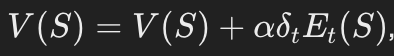

### Decay to The Eligibility Trace
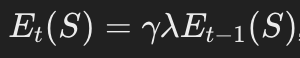

### TD Error
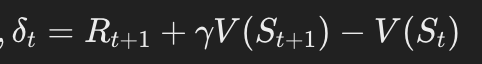

## Overall Summary of the Code : 
### 1. The td_lambda_update function is invoked for each step within an episode, allowing the algorithm to learn from the sequence of states, actions, and rewards experienced.
### 2. The use of eligibility traces means that the effect of a reward is not only attributed to the state immediately preceding it but also to those states that led up to the reward, with their          contributions weighted by how recently they were visited.
### 3. The function update_value_function manages the episode progression and calls td_lambda_update for each step, while also handling the reset of eligibility traces after each episode ends to prepare for the next episode.

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming the main function has been run and 'value_function' is populated

def prepare_data_for_heatmap(value_function):
    # Transform the value function into a format suitable for a DataFrame
    data = {
        'Player Sum': [],
        'Dealer Card': [],
        'Has Usable Ace': [],
        'Value': []
    }
    for (player_sum, dealer_card, usable_ace), value in value_function.items():
        data['Player Sum'].append(player_sum)
        data['Dealer Card'].append(dealer_card)
        data['Has Usable Ace'].append('Yes' if usable_ace else 'No')
        data['Value'].append(value)
    return pd.DataFrame(data)

def plot_heatmap(df, title="Value Function"):
    # Correcting the pivot call by specifying column names as keyword arguments
    pivot_table = df.pivot(index="Player Sum", columns="Dealer Card", values="Value")
    plt.figure(figsize=(12, 9))
    sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title(title)
    plt.ylabel("Player's Sum")
    plt.xlabel("Dealer's Showing Card")
    plt.show()



Player's Current Sum : 21 , Dealer's Card : 10 , Does Player have Ace : True
Player's Current Sum : 15 , Dealer's Card : 9 , Does Player have Ace : False
Player's Current Sum : 20 , Dealer's Card : 5 , Does Player have Ace : True
Player's Current Sum : 20 , Dealer's Card : 7 , Does Player have Ace : False
Player's Current Sum : 15 , Dealer's Card : 9 , Does Player have Ace : False
Player's Current Sum : 19 , Dealer's Card : 9 , Does Player have Ace : False
Player's Current Sum : 17 , Dealer's Card : 10 , Does Player have Ace : True
Player's Current Sum : 17 , Dealer's Card : 10 , Does Player have Ace : False
Player's Current Sum : 15 , Dealer's Card : 8 , Does Player have Ace : False
Player's Current Sum : 20 , Dealer's Card : 8 , Does Player have Ace : False
Player's Current Sum : 12 , Dealer's Card : 9 , Does Player have Ace : True
Player's Current Sum : 16 , Dealer's Card : 9 , Does Player have Ace : True
Player's Current Sum : 21 , Dealer's Card : 9 , Does Player have Ace : True
Pl

/opt/homebrew/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Player's Current Sum : 14 , Dealer's Card : 10 , Does Player have Ace : False
Player's Current Sum : 21 , Dealer's Card : 10 , Does Player have Ace : False
Player's Current Sum : 12 , Dealer's Card : 10 , Does Player have Ace : True
Player's Current Sum : 21 , Dealer's Card : 10 , Does Player have Ace : True
Player's Current Sum : 11 , Dealer's Card : 9 , Does Player have Ace : False
Player's Current Sum : 16 , Dealer's Card : 9 , Does Player have Ace : False
Player's Current Sum : 17 , Dealer's Card : 6 , Does Player have Ace : False
Player's Current Sum : 13 , Dealer's Card : 10 , Does Player have Ace : False
Player's Current Sum : 17 , Dealer's Card : 10 , Does Player have Ace : False
Player's Current Sum : 13 , Dealer's Card : 8 , Does Player have Ace : False
Player's Current Sum : 15 , Dealer's Card : 8 , Does Player have Ace : False
Player's Current Sum : 21 , Dealer's Card : 8 , Does Player have Ace : False
Player's Current Sum : 5 , Dealer's Card : 8 , Does Player have Ace : Fa

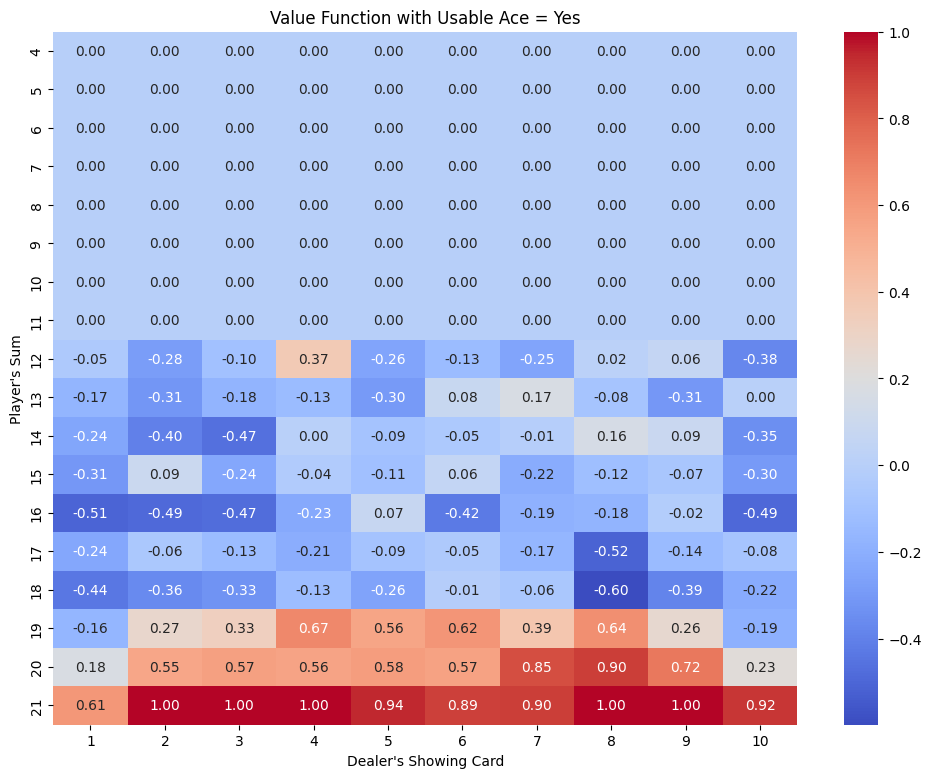

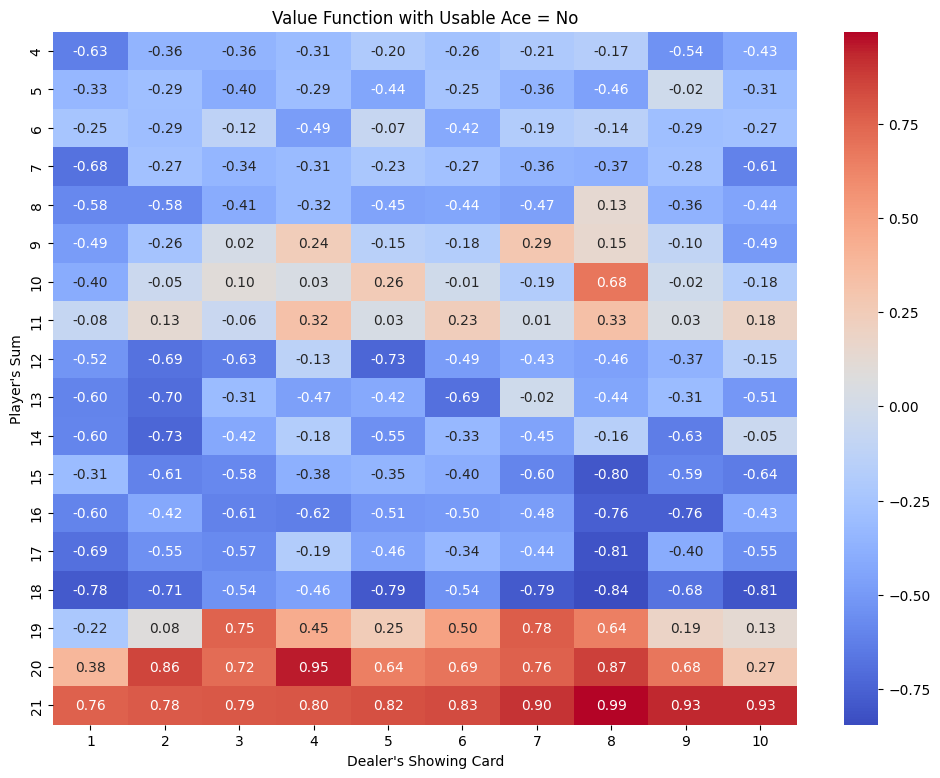

In [85]:
def main():
    env = gym.make('Blackjack-v1')
    gamma = 1.0  # Discount factor for Blackjack
    alpha = 0.1  # Learning rate
    lamb = 0.8  # Eligibility trace decay rate
    num_episodes = 50000

    # Initialize value function and eligibility traces
    value_function = {(player, dealer, ace): 0 for player in range(4, 22) for dealer in range(1, 11) for ace in [False, True]}
    elig = {(player, dealer, ace): 0 for player in range(4, 22) for dealer in range(1, 11) for ace in [False, True]}


    for _ in range(num_episodes):
        update_value_function(env, value_function, elig, alpha, gamma, lamb)

    # Display a portion of the value function
    for state in list(value_function.keys())[-10:-1]:                       
        print(f"State: {state}, Value: {value_function[state]}")
        print("\n")
        
    # Prepare the DataFrame
    df = prepare_data_for_heatmap(value_function)

    # Plot heatmaps for scenarios with and without a usable ace
    for has_ace in ['Yes', 'No']:
        filtered_df = df[df['Has Usable Ace'] == has_ace]
        plot_heatmap(filtered_df, f"Value Function with Usable Ace = {has_ace}")

if __name__ == "__main__":
    main()

# Some Insights : 
### 1. Impact of Usable Ace: The presence of a usable ace significantly increases the expected value of player hands across the board.
### 2. Safe Zone with Ace: When the player has a usable ace, they have more positive expected values, indicating a 'safe zone' where the risk of busting is reduced.
### 3. Dealer's Weak Cards: Both graphs show higher expected values for player hands against dealer's showing cards 4, 5, or 6, known as the dealer's "bust cards".
### 4. Risk of Player's Bust: Without a usable ace, the value drops sharply for player hands of 12-16, indicating a high risk of busting when hitting.
### 5. Strong Dealer Cards: Against dealer's strong cards (7 to Ace), the expected values decrease for the player, emphasizing the dealer's advantageous position.
### 6. Zero Values for Low Sums: There are zero values for player sums less than 11 when the player has a usable ace, possibly indicating these states are rarely reached or have neutral expectations due to the policy of always hitting in these scenarios.
### 7. High Values for 21: Player sums of 21 have the highest values in both graphs, confirming it as the optimal hand.
### 8. Dip for Dealer's 7: In the "No Usable Ace" graph, there's a dip in value for player sums of 17 against a dealer's 7, indicating a pivot point where the dealer's chance of obtaining a strong hand increases.
### 9. Optimal Stands: High positive values for player sums of 17-20 suggest that standing is often the optimal decision in these scenarios.
### 10. Negative Spike for Player's 16: There's a pronounced negative spike for a player sum of 16, particularly against strong dealer cards in the "No Usable Ace" graph, underscoring this as one of the worst hands in Blackjack.